# Exploring Relationships of Early Modern Quakers

The Society of Friends, i.e. the Quakers, were Protestant Christians from the Church of England. Researchers have been interested in studying thir relationships to understand the social networks of seventeenth-century elites. This dataset comes from the Oxford Dictionary of National Biography and consists of two files. quakers_nodelist.csv contains a list of Quakers along with attributes that are their historical significance, gender, birthdate, deathdate, and a unique identifier ID. It contains 119 Quakers that are viewed as nodes. The second file, quakers_edgelist, is the file of edges, which means whether the two people know each other. Obviously, this dataset is non-directed. Moreover, this dataset is not weighted as whether two people know each other or not is a binary variable.

Now, I will perform some analysis of this circle of friends and see what their relationships are like.

Remember to install the package: pip install networkx==2.4

In [19]:
import csv
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community 

This step imports data.

In [3]:
# import data

with open('quakers_nodelist.csv', 'r') as nodecsv: # Open the file
    nodereader = csv.reader(nodecsv) # Read the csv
    # Retrieve the data (using Python list comprhension and list slicing to remove the header row, see footnote 3)
    nodes = [n for n in nodereader][1:]

node_names = [n[0] for n in nodes] # Get a list of only the node names

with open('quakers_edgelist.csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv
    edges = [tuple(e) for e in edgereader][1:] # Retrieve the data
    
# will use node_names and edges from now on

I performed a sanity check to make sure that the imported data is correct.

In [4]:
# sanity check

print(len(node_names))
print(len(edges))

119
174


I created the graph based on the nodes and the edges. I printed the information of the graph, which says the graph has 119 nodes, 174 friendships, and 2.9244 average degree. Average degree is the average number of connections of each node in the network. 

In [5]:
# initialize graph

G = nx.Graph() # empty graph
G.add_nodes_from(node_names) # add nodes
G.add_edges_from(edges) # add edges
print(nx.info(G)) # get the information of the graph


Name: 
Type: Graph
Number of nodes: 119
Number of edges: 174
Average degree:   2.9244


Now it's time to add the attributes to the graph for future (possible) analyses. I will be able to access any attribute at any time if I specify a node. 

In [6]:
# add attributes to graph

hist_sig_dict = {}
gender_dict = {}
birth_dict = {}
death_dict = {}
id_dict = {}

for node in nodes: # Loop through the list, one row at a time
    hist_sig_dict[node[0]] = node[1]
    gender_dict[node[0]] = node[2]
    birth_dict[node[0]] = node[3]
    death_dict[node[0]] = node[4]
    id_dict[node[0]] = node[5]
    
nx.set_node_attributes(G, hist_sig_dict, 'historical_significance')
nx.set_node_attributes(G, gender_dict, 'gender')
nx.set_node_attributes(G, birth_dict, 'birth_year')
nx.set_node_attributes(G, death_dict, 'death_year')
nx.set_node_attributes(G, id_dict, 'sdfb_id')

for n in G.nodes(): # Loop through every node, in our data "n" will be the name of the person
    print(n, G.nodes[n]['birth_year']) # Access every node by its name, and then by the attribute "birth_year"



Joseph Wyeth 1663
Alexander Skene of Newtyle 1621
James Logan 1674
Dorcas Erbery 1656
Lilias Skene 1626
William Mucklow 1630
Thomas Salthouse 1630
William Dewsbury 1621
John Audland 1630
Richard Claridge 1649
William Bradford 1663
Fettiplace Bellers 1687
John Bellers 1654
Isabel Yeamans 1637
George Fox the younger 1551
George Fox 1624
John Stubbs 1618
Anne Camm 1627
John Camm 1605
Thomas Camm 1640
Katharine Evans 1618
Lydia Lancaster 1683
Samuel Clarridge 1631
Thomas Lower 1633
Gervase Benson 1569
Stephen Crisp 1628
James Claypoole 1634
Thomas Holme 1626
John Freame 1665
John Swinton 1620
William Mead 1627
Henry Pickworth 1673
John Crook 1616
Gilbert Latey 1626
Ellis Hookes 1635
Joseph Besse 1683
James Nayler 1618
Elizabeth Hooten 1562
George Whitehead 1637
John Whitehead 1630
William Crouch 1628
Benjamin Furly 1636
Silvanus Bevan 1691
Robert Rich 1607
John Whiting 1656
Christopher Taylor 1614
Thomas Lawson 1630
Richard Farnworth 1630
William Coddington 1601
Thomas Taylor 1617
Richard 

I then analyzed the metrics of the network. The first thing I wanted to study was how dense the network is. Density is defined to be the ratio of actual edges in the network to all possible edges in the network. Since this is an undirected network, there can only be one single edge between any two nodes. From the outside, the network has 174 edges and 119 nodes, and since the average friend someone has is around 2, the network shouldn't be that dense. The result confirms my guess. Having a 0.02 density, the network shows that out of all possible relationships people COULD have, people only had 2% of those relationships. This means that the network is ideal for creating an visualization. 

In [7]:
# network density
# density: the ratio of actual edges in the network to all possible edges in the network

density = nx.density(G)
print("Network density:", density)

Network density: 0.02478279447372169


I also was interested in seeing whether the graph is connected. Having a connected graph means that if we choose any person and trace the relationshp of that person's friends, that person is able to know every single person from someone else. This graph turned out to be unconnected, which means there are isolated cleques among those people. 

I also found the largest component of the graph, which means the largest cleque among those people. The names printed are those in this cleque. 

Diameter is defined to be the longest of all shorted paths. After calculating all shortest paths between every possible pair of nodes in the network, diameter is the length of the path between the two nodes that are furthest apart. Diameter turned out to be 8 which means that if we randomly pick someone in the largest cleque, it takes at most 8 relationships for that person to know any other person in the cleaque.

I tested whether the graph is connected or not first because if the graph is not connected, as it is, calculating diameter doesn't make any sense since there is no available path between nodes of one component and nodes of another.

In [20]:
# longest path
# note: graph not connected

print(nx.is_connected(G))

# use nx.connected_components to get the list of components,
# use the max() command to find the largest one:
components = nx.connected_components(G)
largest_component = max(components, key=len)
print(largest_component)

# create a "subgraph" of just the largest component
# calculate the diameter of the subgraph, just like with density.

subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

False
{'Dorcas Erbery', 'Henry Pickworth', 'Mary Penington', 'Elizabeth Leavens', 'Franciscus Mercurius van Helmont', 'Francis Bugg', 'Solomon Eccles', 'Thomas Lower', 'Elizabeth Hooten', 'James Logan', 'Tace Sowle', 'William Mead', 'Richard Farnworth', 'Isabel Yeamans', 'Robert Barclay', 'Alexander Parker', 'William Coddington', 'Samuel Fisher', 'William Edmundson', 'Rebecca Travers', 'Thomas Lawson', 'Lewis Morris', 'John Penington', 'John Story', 'Mary Prince', 'William Caton', 'Ellis Hookes', 'William Ames', 'John Stubbs', 'Thomas Ellwood', 'Anthony Sharp', 'John Crook', 'Richard Claridge', 'William Mucklow', 'Thomas Curtis', 'Thomas Holme', 'Edward Pyott', 'George Whitehead', 'Edward Burrough', 'James Claypoole', 'Sir Charles Wager', 'Thomas Aldam', 'John Burnyeat', 'Francis Howgill', 'John Swinton', 'Martha Simmonds', 'Mary Fisher', 'Silvanus Bevan', 'Benjamin Furly', 'Anne Conway Viscountess Conway and Killultagh', 'Gilbert Latey', 'Anne Camm', 'Charles Marshall', 'Margaret Fell

Transitivity is the ratio of all triangles over all possible triangles. When one person knows two people, a triangle is formed. Therefore, transitivity expresses how interconnected the graph is compared to how interconnected it could have been if everyone knew each other. Transitivity is 0.17.

In [9]:
# transitivity

triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.16937799043062202


Next, I wanted to study which nodes were the most important ones, i.e. which person had the most influence among all people. Centrality measures this. Since importance can be defined in different ways, different centrality measures are defined. I used degree here because it is the simplest way for centrality measure. Degree is defined to be the number of friendships a person has. The person with the most number of friends thus has the highest degree. I printed out the top 20 significant people as seen below.

In [10]:
# centrality

degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('George Fox', 22)
('William Penn', 18)
('James Nayler', 16)
('George Whitehead', 13)
('Margaret Fell', 13)
('Benjamin Furly', 10)
('Edward Burrough', 9)
('George Keith', 8)
('Thomas Ellwood', 8)
('Francis Howgill', 7)
('John Perrot', 7)
('John Audland', 6)
('Richard Farnworth', 6)
('Alexander Parker', 6)
('John Story', 6)
('John Stubbs', 5)
('Thomas Curtis', 5)
('John Wilkinson', 5)
('William Caton', 5)
('Anthony Pearson', 5)


Then, I moved onto constructing the adjacency matrix to visuailze the dataset. Adjacency matrix is an intuitive way to represent the relationships betwen two people. Since the graph is undirected and unweighted, the possible values in the matrix are 0 and 1, where 0 means the two people don't know each other and 1 means the two people know each other. I plotted the heatmaps of the adjacency matrix as seen below. Heatmap is a kind of visualization technique that shows the intensity of  Both heatmaps shows the magnitude of a pheomenon as color in two dimensions. Both heatmaps are binary, as the matrix is binary. In the first heatmap, shaded areas are the non-existent relationships, and in the second heatmap, shaded areas are the existent relationships. Recall that the density of the graph is only 2%, and the heatmaps confirm this calculation since very little area is occupied by existent relationships.

In [11]:
# adjacency matrix
A = nx.to_numpy_array(G, nodelist=node_names)


<AxesSubplot:>

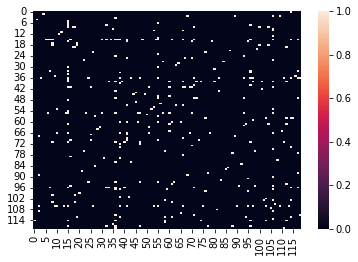

In [12]:
# heatmap 1

import seaborn as sns
sns.heatmap(A)

<AxesSubplot:>

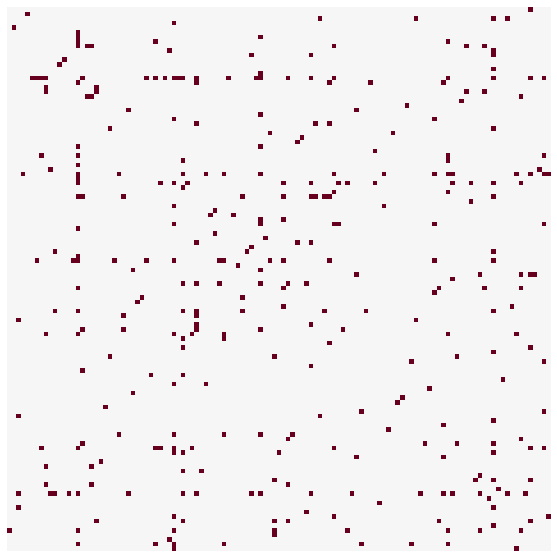

In [13]:
# heatmap 2 (inverted)

from graspologic.plot import heatmap
heatmap(A, cbar=False)

The third heatmap is an permuted one and this represents the exact same graph as the previous two because adjacency matrices only specify the existence of certain relationships not the ordering of the relationships. As long as the relationship is recorded as 1 in the matrix, it will be represented in the heatmap. Therefore, although the permuted heatmap looks very differrent from the previous two, the number of dots in the permuted heatmap is the exact same as before as it reflects the density of the graph.

<AxesSubplot:>

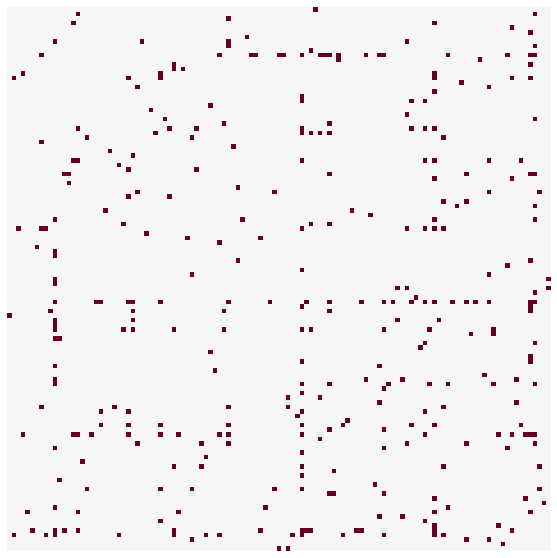

In [14]:
# heatmap 3 (permuted)

# generate a random permutation
import numpy as np
rng = np.random.default_rng(8888)
n = len(A)  # n is the number of nodes
perm = rng.permutation(n)
A_perm = A[perm][:, perm]
heatmap(A_perm, cbar=False)

Lastly, I visualized the graph in the most intuitive way. I created a static version and an animated version. Consistent with the previous analysis, there is one large cleque and multiple other isolated cleques. I also found the most important person, George Fox, and confirmed that this person had 22 friendships.

A very interesting thing I noticed about this animated package is that if you use your curser to drag an important person, the whole cleque moves around fairly easily. But if you drag a less important person, the cleque barely moves at all. This probably has some real-world meaning!

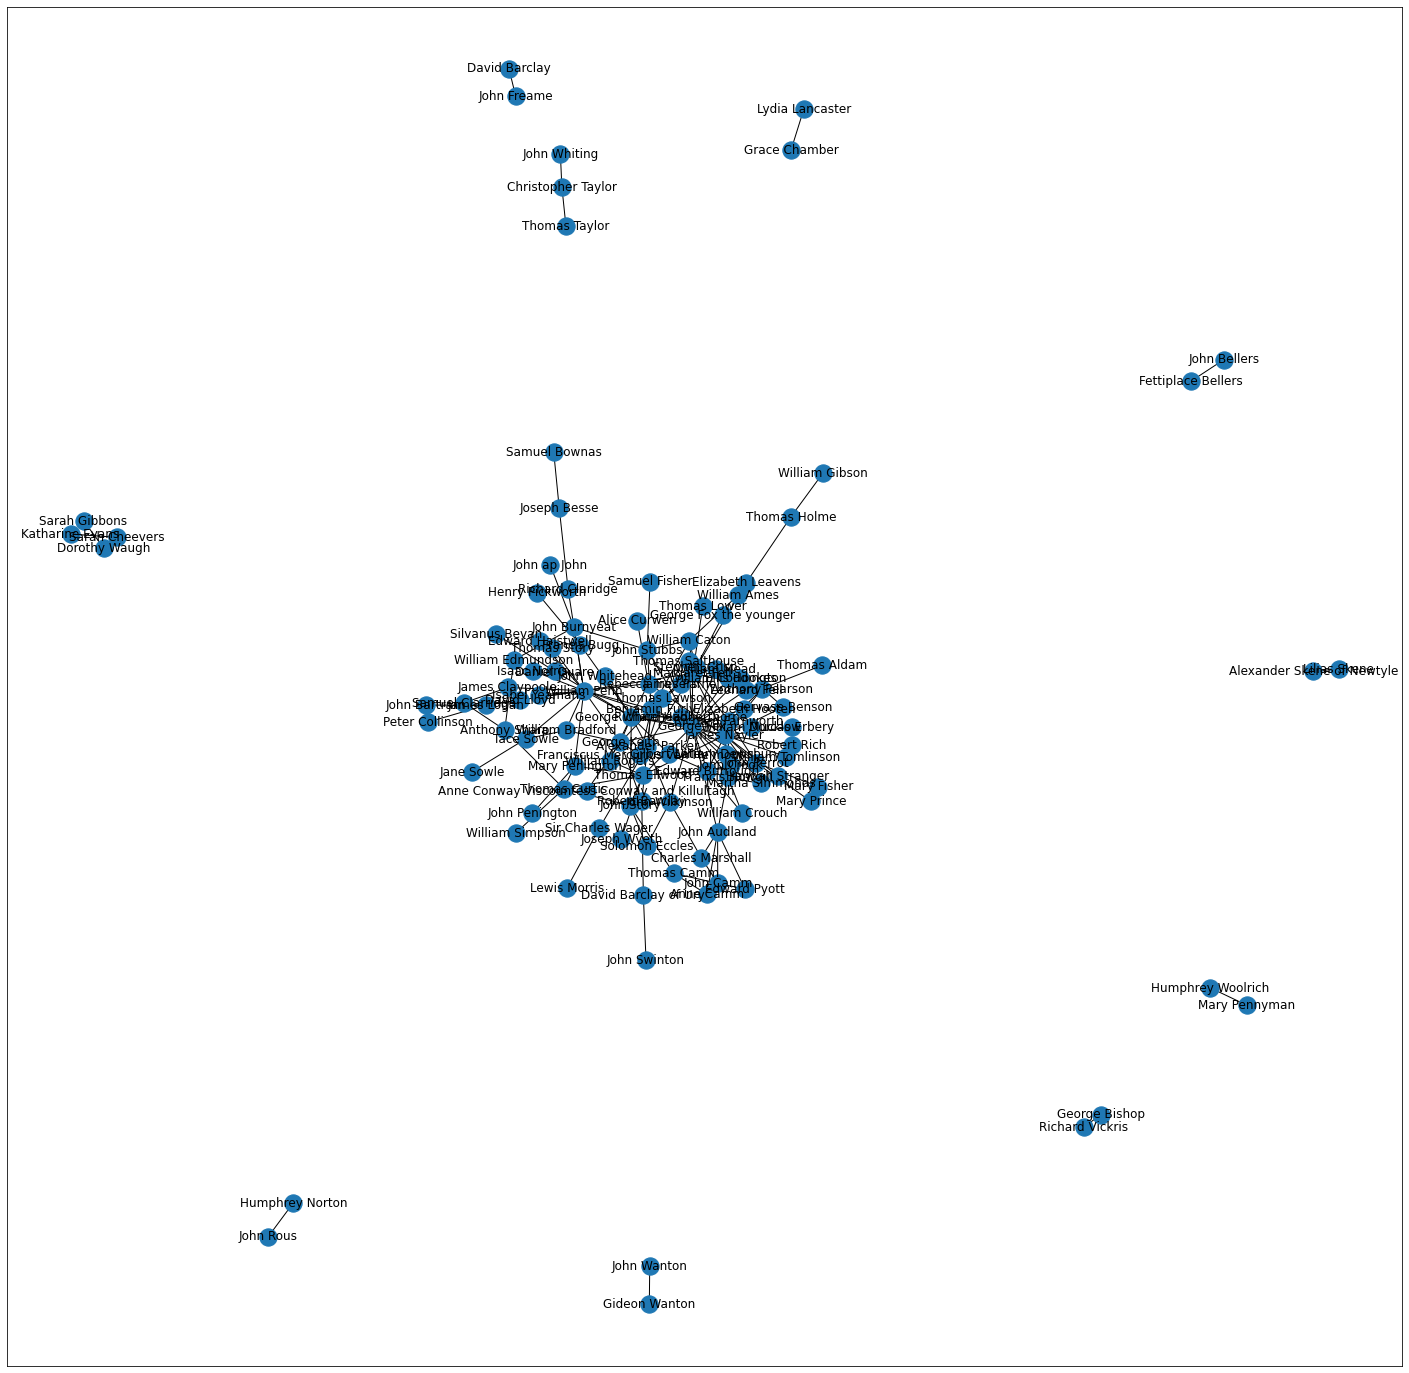

In [15]:
# network layouts (static)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(25, 25))
nx.draw_networkx(G, ax=ax)

In [22]:
# network layouts (interactive)
# https://towardsdatascience.com/pyvis-visualize-interactive-network-graphs-in-python-77e059791f01

from pyvis.network import Network
net = Network(notebook = True)
node_index = [i+1 for i in range(len(node_names))]
net.add_nodes(node_index, label = node_names)

node_dict = dict(zip(node_names, node_index))
import copy
edges_num = copy.copy(edges) # create copy of edges
for index, item in enumerate(edges_num):
    itemlist = list(item)
    itemlist[0] = node_dict[itemlist[0]]
    itemlist[1] = node_dict[itemlist[1]]
    item = tuple(itemlist)
    edges_num[index] = item

net.add_edges(edges_num)
net.show('nodes.html')


To conclude, this is a very interesting network as there are so many more directions that can be explored. The attributes each person contains can be used to partition the graph into different partitions and study the importance of the attributes and the clustering of people when they have different attributes. For example, whether male Quakers were more likely to be important nodes compared to female Quakers. So many more things to be explored!